In [ ]:
!pip install umap-learn
!pip install hdbscan

In [ ]:
import hdbscan
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("all_courses.csv")
data

,Предмет,0,1,2,3,4,6,7,8,9,...,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118
0,Основы и методология программирования,-1.0,-1.0,-1.0,6.0,-1.0,9.0,7.0,-1.0,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,Основы и методология программирования (углубле...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,4.0,-1.0,-1.0,-1.0,10.0,-1.0,-1.0,9.0,-1.0,-1.0
2,Алгоритмы и структуры данных 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Алгоритмы и структуры данных 2 (углубленный курс),-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,7.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,10.0
4,Глубинное обучение,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Дополнительные главы дискретной математики 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
112,Разработка мобильных приложений Android,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
113,Основы телекоммуникационных технологий,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
114,Медицинская биоинформатика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


**UMAP**

In [ ]:
df = pd.read_csv("all_courses.csv")

In [ ]:
target = df.iloc[:, :1].values
target = np.unique(target)

In [ ]:
target_encoded = pd.factorize(target)[0]

In [ ]:
df_umap = df.iloc[:, 1:].values

Метрика - корреляция

In [ ]:
embedding = umap.UMAP(metric='correlation').fit_transform(df_umap)
embedding.shape

(116, 2)

*Алгоритм кластризации HDBSCAN*

In [ ]:
hdb = hdbscan.HDBSCAN()
scoreTitles = hdb.fit(embedding)
labels = scoreTitles.labels_
df["cluster"] = labels
df

,Предмет,0,1,2,3,4,6,7,8,9,...,1110,1111,1112,1113,1114,1115,1116,1117,1118,cluster
0,Основы и методология программирования,-1.0,-1.0,-1.0,6.0,-1.0,9.0,7.0,-1.0,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
1,Основы и методология программирования (углубле...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,10.0,-1.0,-1.0,9.0,-1.0,-1.0,1
2,Алгоритмы и структуры данных 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
3,Алгоритмы и структуры данных 2 (углубленный курс),-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,10.0,2
4,Глубинное обучение,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Дополнительные главы дискретной математики 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
112,Разработка мобильных приложений Android,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
113,Основы телекоммуникационных технологий,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
114,Медицинская биоинформатика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4}

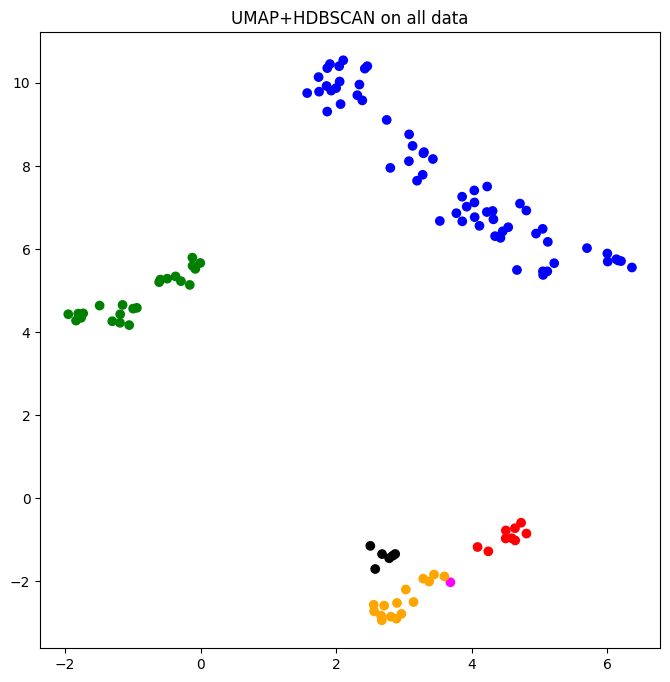

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"orange"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+HDBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = df[df["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 9 элементов 

Безопасность компьютерных систем
Дизайн систем
Теория отказоустойчивых распределенных систем
Методы и системы обработки больших данных
Введение в блокчейн
DevOps
Облачные вычисления
Децентрализованные системы
Научно-исследовательский семинар "Распределенные системы 2"


В кластере  1 - 23 элементов 

Основы и методология программирования
Основы и методология программирования (углубленный курс)
Вводный курс по математическому анализу
Практикум по линейной алгебре
Вводный курс по дискретной математике
Дополнительные главы дискретной математики 1
Теория вероятности и статистика в примерах и задачах
Дискретная математика (углубленный курс)
Дискретная математика
Линейная алгебра и геометрия
Линейная алгебра и геометрия (углубленный курс)
Математический анализ (углубленный курс)
Алгоритмы и структуры данных
Алгоритмы и структуры данных (углубленный курс)
Математический анализ
Вводный курс по дискретной математике 2
Алгебра
Алгебра (углубленный курс)
Практикум по

*Алгоритм кластризации DBSCAN*

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(embedding)
labels = dbscan.labels_
df["cluster"] = labels
df.tail()

,Предмет,0,1,2,3,4,6,7,8,9,...,1110,1111,1112,1113,1114,1115,1116,1117,1118,cluster
111,Дополнительные главы дискретной математики 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
112,Разработка мобильных приложений Android,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
113,Основы телекоммуникационных технологий,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
114,Медицинская биоинформатика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
115,Моделирование временных рядов,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4


In [ ]:
num_clusters = set(labels)
num_clusters

{0, 1, 2, 3, 4, 5, 6, 7, 8}

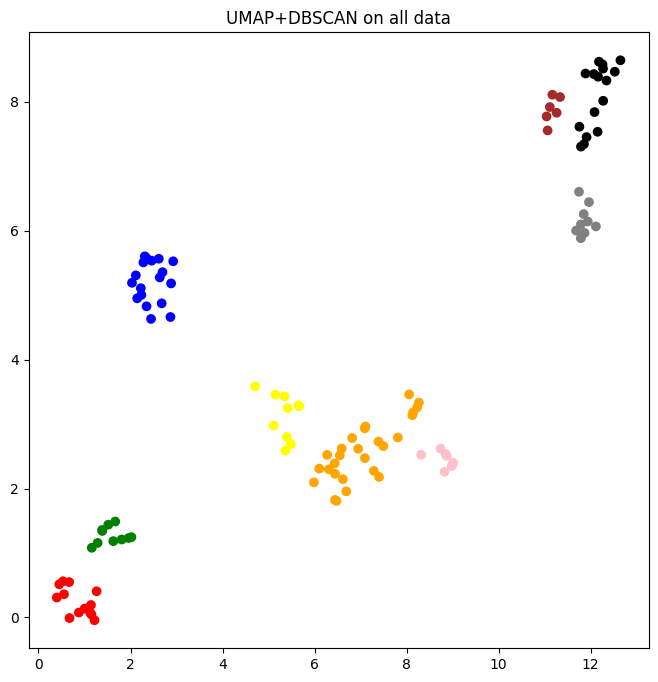

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"orange", 5:"yellow", 6:"pink", 7:"grey", 8:"brown"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+DBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = df[df["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 13 элементов 

Основы и методология программирования
Вводный курс по математическому анализу
Практикум по линейной алгебре
Вводный курс по дискретной математике
Дискретная математика
Линейная алгебра и геометрия
Алгоритмы и структуры данных
Математический анализ
Вводный курс по дискретной математике 2
Алгебра
Подготовка к соревнованиям по анализу данных
Практикум по линейной алгебре 2
Вводный курс по математическому анализу 2


В кластере  1 - 10 элементов 

Основы и методология программирования (углубленный курс)
Дополнительные главы дискретной математики 1
Теория вероятности и статистика в примерах и задачах
Дискретная математика (углубленный курс)
Линейная алгебра и геометрия (углубленный курс)
Математический анализ (углубленный курс)
Алгоритмы и структуры данных (углубленный курс)
Алгебра (углубленный курс)
Практикум по имитационному моделированию стохастических систем
Дополнительные главы дискретной математики 2


В кластере  2 - 18 элементов 

Алгоритмы и структур

Метрика - евклидово расстояние

In [ ]:
embedding = umap.UMAP().fit_transform(df_umap)
embedding.shape

(116, 2)

*Алгоритм HDBSCAN*

In [ ]:
hdb = hdbscan.HDBSCAN()
scoreTitles = hdb.fit(embedding)
labels = scoreTitles.labels_
df["cluster"] = labels
df

,Предмет,0,1,2,3,4,6,7,8,9,...,1110,1111,1112,1113,1114,1115,1116,1117,1118,cluster
0,Основы и методология программирования,-1.0,-1.0,-1.0,6.0,-1.0,9.0,7.0,-1.0,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
1,Основы и методология программирования (углубле...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,10.0,-1.0,-1.0,9.0,-1.0,-1.0,4
2,Алгоритмы и структуры данных 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
3,Алгоритмы и структуры данных 2 (углубленный курс),-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,7.0,-1.0,-1.0,-1.0,4.0,-1.0,-1.0,-1.0,10.0,4
4,Глубинное обучение,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Дополнительные главы дискретной математики 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
112,Разработка мобильных приложений Android,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
113,Основы телекоммуникационных технологий,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
114,Медицинская биоинформатика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4}

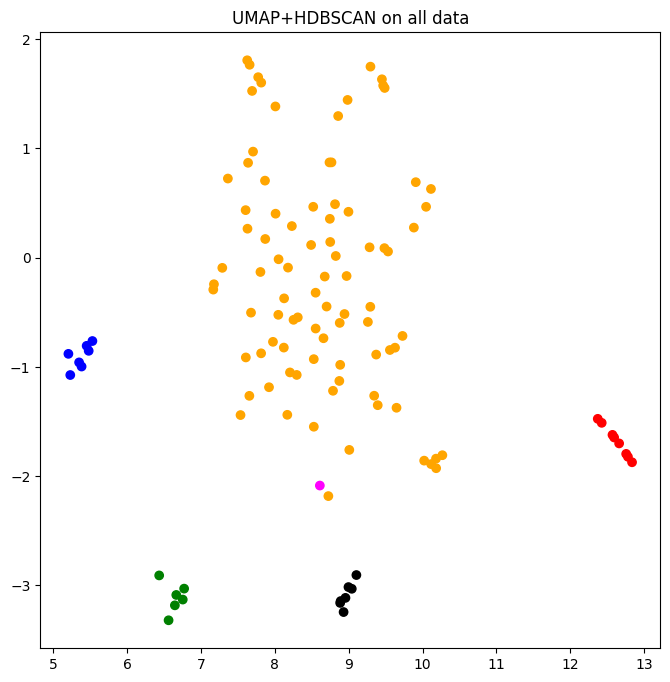

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"orange"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+HDBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = df[df["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 8 элементов 

Дизайн систем
Теория отказоустойчивых распределенных систем
Методы и системы обработки больших данных
Введение в блокчейн
DevOps
Облачные вычисления
Децентрализованные системы
Научно-исследовательский семинар "Распределенные системы 2"


В кластере  1 - 6 элементов 

Машинное обучение 1
Прикладная статистика в машинном обучении
Введение в глубинное обучение
Методы оптимизации в машинном обучении
Машинное обучение 2
Научно-исследовательский семинар "Машинное обучение и приложения"


В кластере  2 - 7 элементов 

Распределенные системы
Компьютерные сети
Сервис-ориентированные архитектуры
Системы баз данных
Научно-исследовательский семинар "Распределённые системы"
Теория и практика многопоточной синхронизации
Методы оптимизации


В кластере  3 - 7 элементов 

Алгоритмы и структуры данных 2
Язык программирования C++ (углубленный курс)
Инструменты промышленной разработки
Математический анализ 2
Теория вероятностей и математическая статистика
Основы матричных вы

*Алгоритм DBSCAN*

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(embedding)
labels = dbscan.labels_
df["cluster"] = labels
df.tail()

,Предмет,0,1,2,3,4,6,7,8,9,...,1110,1111,1112,1113,1114,1115,1116,1117,1118,cluster
111,Дополнительные главы дискретной математики 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
112,Разработка мобильных приложений Android,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
113,Основы телекоммуникационных технологий,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
114,Медицинская биоинформатика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
115,Моделирование временных рядов,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

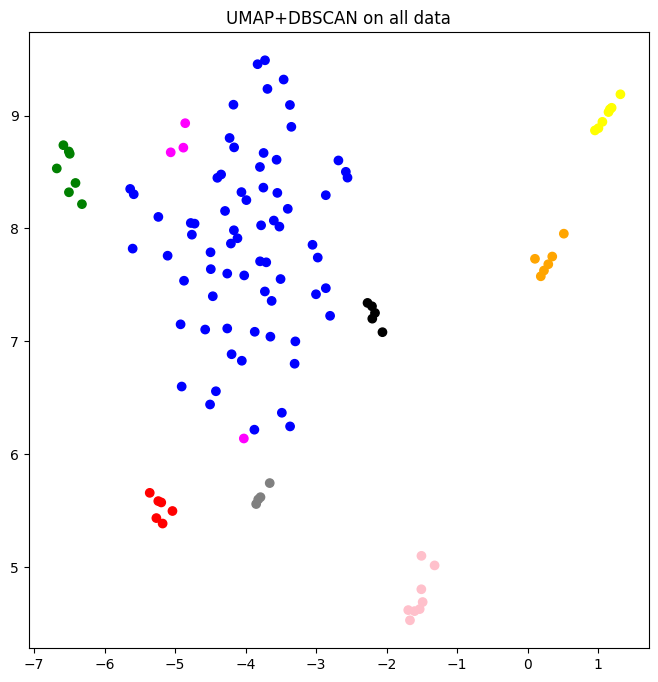

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"orange", 5:"yellow", 6:"pink", 7:"grey"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+DBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = df[df["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 6 элементов 

Основы и методология программирования
Дискретная математика
Линейная алгебра и геометрия
Алгоритмы и структуры данных
Математический анализ
Алгебра


В кластере  1 - 7 элементов 

Алгоритмы и структуры данных 2
Язык программирования C++ (углубленный курс)
Инструменты промышленной разработки
Математический анализ 2
Теория вероятностей и математическая статистика
Основы матричных вычислений
Архитектура компьютера и операционные системы


В кластере  2 - 69 элементов 

Алгоритмы и структуры данных 2 (углубленный курс)
Теория вычислений
Проектирование отказоустойчивых систем 1
Безопасность компьютерных систем
Теория баз данных
Язык SQL
Сбор и обработка данных с помощью краудсорсинга
Основы тензорных вычислений
Биоинформатика
Теория статистического обучения
Вводный курс по математическому анализу
Практикум по линейной алгебре
Вводный курс по дискретной математике
Дополнительные главы дискретной математики 1
Дополнительные главы теории вероятностей 2
Теория веро